In [6]:
import pandas as pd
import numpy as np

In [7]:
cities = np.array(["Tehran", "Mashhad", "Isfahan", "Tabriz", "Shiraz", "Ahvaz"])
days = np.tile(np.arange(1, 31), len(cities))       # [1,2,...,30,1,2,...,30,...]
city_data = np.repeat(cities, 30)                   # ['Tehran','Tehran',...,'Ahvaz']
temperature = np.random.randint(15, 41, size=len(city_data))
humidity = np.random.randint(20, 81, size=len(city_data))
rainfall = np.random.randint(0, 51, size=len(city_data))
data = pd.DataFrame({
    "city": city_data,
    "day": days,
    "temperature": temperature,
    "humidity": humidity,
    "rainfall": rainfall
})

data


,city,day,temperature,humidity,rainfall
0,Tehran,1,35,67,9
1,Tehran,2,39,66,18
2,Tehran,3,15,75,48
3,Tehran,4,22,34,14
4,Tehran,5,36,77,19
...,...,...,...,...,...
175,Ahvaz,26,28,78,27
176,Ahvaz,27,16,20,10
177,Ahvaz,28,37,37,29
178,Ahvaz,29,40,41,33


In [13]:
mean_stats = data.groupby('city')[['temperature', 'humidity', 'rainfall']].mean()
hottest_city = mean_stats["temperature"].idxmax()
coldest_city = mean_stats["temperature"].idxmin()
rainy_days = data[data["rainfall"] > 10][['temperature']].count()
most_rainy_days = data[data["rainfall"] > 10].groupby('city')[['temperature']].count()

# rainy_days = data[data["rainfall"] > 10].groupby('city')[['temperature']].count().sort_values('temperature', ascending=False)

print('Mean stats of cities', mean_stats)
print('Hottest city', hottest_city)
print('Coldest citiy', coldest_city)
print('Rainy Days', rainy_days)
print('Most Rainy Days In every City', most_rainy_days)

Mean stats of cities          temperature   humidity   rainfall
city                                      
Ahvaz      27.066667  50.933333  22.200000
Isfahan    28.300000  47.366667  27.533333
Mashhad    27.733333  46.533333  24.666667
Shiraz     25.600000  54.433333  26.200000
Tabriz     27.633333  51.366667  25.000000
Tehran     25.800000  57.233333  22.333333
Hottest city Isfahan
Coldest citiy Shiraz
Rainy Days temperature    139
dtype: int64
Most Rainy Days In every City          temperature
city                
Ahvaz             20
Isfahan           27
Mashhad           22
Shiraz            24
Tabriz            22
Tehran            24


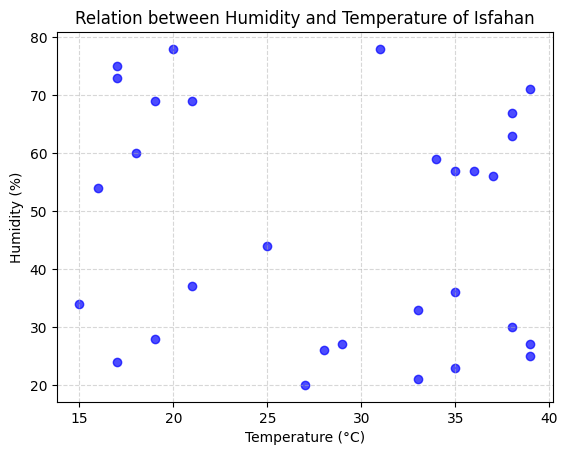

In [9]:
import matplotlib.pyplot as plt

isfahan_data = data[data['city'] == "Isfahan"]
# isfahan_temperatures = data[data['city'] == "Isfahan"]['temperature']
# print(isfahan_humidity)

# رسم نمودار پراکندگی (Scatter Plot)
plt.scatter(isfahan_data['temperature'], isfahan_data['humidity'], color='b', alpha=0.7)

plt.title('Relation between Humidity and Temperature of Isfahan')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### نقاط پراکنده هستند و هیچ ارتباطی به هم ندارند
#### طبیعتا به خاطر تصادفی بودن اطلاعات این موضوع طبیعی است